# News Classification

## Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
dataset = pd.read_csv('news_data.csv')
dataset.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,closer look solar fuel potenti,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,irresist scent make locust swarm studi find,en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,artifici intellig warn ai know us better know,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,glacier could sculpt mar valley studi,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,perseid meteor shower 2020 time see huge brigh...,en


In [3]:
# Shape of Dataset
print("Number of Rows :-> ", dataset.shape[0])
print("Number of Columns :-> ", dataset.shape[1])

Number of Rows :->  15774
Number of Columns :->  6


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15774 entries, 0 to 15773
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   topic           15774 non-null  object
 1   link            15774 non-null  object
 2   domain          15774 non-null  object
 3   published_date  15774 non-null  object
 4   title           15774 non-null  object
 5   lang            15774 non-null  object
dtypes: object(6)
memory usage: 739.5+ KB


## Exploratory Data Analysis

In [5]:
dataset['topic'].value_counts()

BUSINESS         4000
SPORTS           4000
ENTERTAINMENT    4000
SCIENCE          3774
Name: topic, dtype: int64

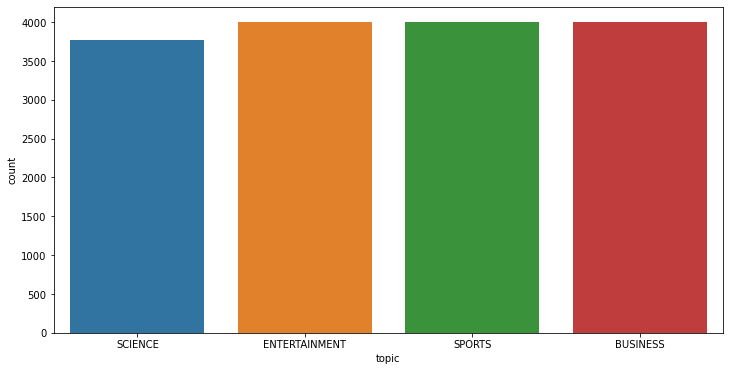

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=dataset, x='topic')
plt.show()

In [7]:
dataset['lang'].value_counts()

en    15774
Name: lang, dtype: int64

In [8]:
dataset['domain'].value_counts()

globenewswire.com                           329
dailymail.co.uk                             297
express.co.uk                               226
timesofindia.indiatimes.com                 167
theguardian.com                             162
                                           ... 
brandequity.economictimes.indiatimes.com      1
keralakaumudi.com                             1
eturbonews.com                                1
kenyans.co.ke                                 1
betterdwelling.com                            1
Name: domain, Length: 2199, dtype: int64

## Handelling Missing and Duplicated Values

In [9]:
# Check for Null values
dataset.isnull().sum()

topic             0
link              0
domain            0
published_date    0
title             0
lang              0
dtype: int64

In [10]:
# Check for Duplicate values
print(dataset.duplicated().sum())
dataset.drop_duplicates(keep='first', inplace=True)

15

### Analyzing the 'published_date' 

In [11]:
dataset['published_date']

0        2020-08-06 13:59:45
1        2020-08-12 15:14:19
2        2020-08-13 21:01:00
3        2020-08-03 22:18:26
4        2020-08-12 19:54:36
                ...         
15769    2020-08-05 16:13:00
15770    2020-08-11 05:52:42
15771    2020-08-16 11:43:05
15772    2020-08-15 10:58:03
15773    2020-08-06 07:22:00
Name: published_date, Length: 15774, dtype: object

In [12]:
import datetime

In [13]:
date_time_df = pd.DataFrame()
date_time_df['Date Time'] = dataset['published_date'].copy()

In [14]:
def to_month(dtime):
    month = datetime.datetime.strptime(dtime[:10], '%Y-%m-%d').month
    return month
def to_year(dtime):
    year = datetime.datetime.strptime(dtime[:10], '%Y-%m-%d').year
    return year
def to_day(dtime):
    day = datetime.datetime.strptime(dtime[:10], '%Y-%m-%d').day
    return day

### For Month

In [15]:
date_time_df['Month'] = date_time_df['Date Time'].apply(lambda x: to_month(x))

In [16]:
date_time_df['Month'].value_counts()

8     15633
7        29
6        28
5        20
4        14
11       13
9        11
10        8
12        6
3         6
2         4
1         2
Name: Month, dtype: int64

### For Year

In [17]:
date_time_df['Year'] = date_time_df['Date Time'].apply(lambda x: to_year(x))

In [18]:
date_time_df['Year'].value_counts()

2020    15703
2019       40
2017       16
2018       11
2016        2
2015        1
2012        1
Name: Year, dtype: int64

### For Day

In [19]:
date_time_df['Day'] = date_time_df['Date Time'].apply(lambda x: to_day(x))

In [20]:
date_time_df['Day'].value_counts()

17    1274
4     1228
10    1185
12    1139
11    1125
6     1122
7     1120
14    1120
13    1113
5     1099
3      874
9      805
16     790
8      751
15     680
2      175
18      97
1       15
31      10
23       9
27       8
28       8
30       6
21       5
20       4
29       4
22       3
26       2
25       2
24       1
Name: Day, dtype: int64

In [21]:
date_time_df.head()

,Date Time,Month,Year,Day
0,2020-08-06 13:59:45,8,2020,6
1,2020-08-12 15:14:19,8,2020,12
2,2020-08-13 21:01:00,8,2020,13
3,2020-08-03 22:18:26,8,2020,3
4,2020-08-12 19:54:36,8,2020,12


In [22]:
date_time_df[(date_time_df['Month'] == 8) & (date_time_df['Year'] == 2020)]

,Date Time,Month,Year,Day
0,2020-08-06 13:59:45,8,2020,6
1,2020-08-12 15:14:19,8,2020,12
2,2020-08-13 21:01:00,8,2020,13
3,2020-08-03 22:18:26,8,2020,3
4,2020-08-12 19:54:36,8,2020,12
...,...,...,...,...
15769,2020-08-05 16:13:00,8,2020,5
15770,2020-08-11 05:52:42,8,2020,11
15771,2020-08-16 11:43:05,8,2020,16
15772,2020-08-15 10:58:03,8,2020,15


Most of the News are from August Month of year 2020

## Text Preprocessing

- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop words and punctuation
- Stemming

In [23]:
import nltk
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer

ps = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

In [24]:
def tranform_text(text):
    text = text.lower()     # Converting to lower case

    word_arr = nltk.word_tokenize(text)     # Tokenizing
    correct = []

    for word in word_arr:
        if (word.isalnum()) and (word not in STOPWORDS) and (word not in punctuation):      # Removal of special char, stop words, punctuation
            correct.append(ps.stem(word))                                                   # Stemming

    return " ".join(correct)

In [25]:
dataset['title'] = dataset['title'].apply(tranform_text)

In [26]:
df = dataset[["topic","title"]]
df.head()

,topic,title
0,SCIENCE,closer look solar fuel potenti
1,SCIENCE,irresist scent make locust swarm studi find
2,SCIENCE,artifici intellig warn ai know us better know
3,SCIENCE,glacier could sculpt mar valley studi
4,SCIENCE,perseid meteor shower 2020 time see huge brigh...


## Word Cloud

In [27]:
from wordcloud import WordCloud
wc = WordCloud()

### Word Cloud for SCIENCE News

In [28]:
science_cloud = wc.generate(df[df['topic'] == 'SCIENCE']['title'].str.cat(sep=' '))

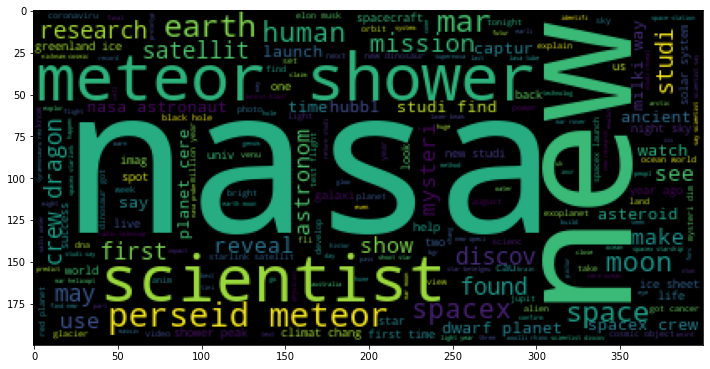

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(science_cloud)
plt.show()

### Word Cloud for ENTERTAINMENT News

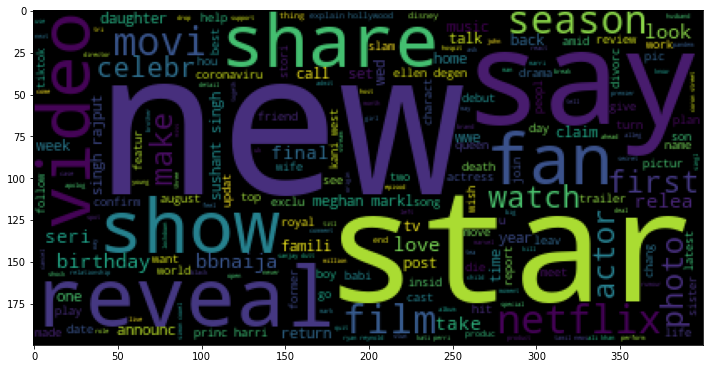

In [30]:
entertainment_cloud = wc.generate(df[df['topic'] == 'ENTERTAINMENT']['title'].str.cat(sep=' '))
plt.figure(figsize=(12,12))
plt.imshow(entertainment_cloud)
plt.show()

### Word Cloud for BUSINESS News

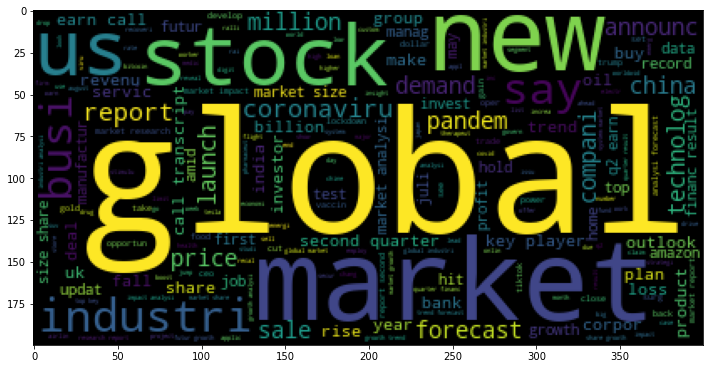

In [31]:
business_cloud = wc.generate(df[df['topic'] == 'BUSINESS']['title'].str.cat(sep=' '))
plt.figure(figsize=(12,12))
plt.imshow(business_cloud)
plt.show()

### Word Cloud for SPORTS News

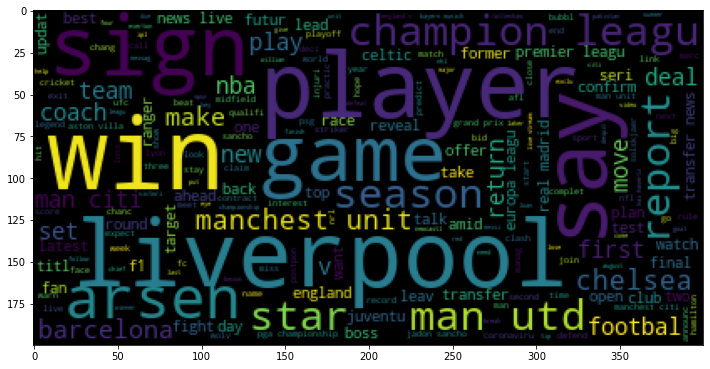

In [32]:
sports_cloud = wc.generate(df[df['topic'] == 'SPORTS']['title'].str.cat(sep=' '))
plt.figure(figsize=(12,12))
plt.imshow(sports_cloud)
plt.show()

## Model Formation

### Text to Vectors

In [33]:
# Using TF-IDF for Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=8000)

In [34]:
text = tfidf.fit_transform(df['title']).toarray()
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [35]:
print("Shape of Transformed Text :-> ",text.shape) 

Shape of Transformed Text :->  (15774, 8000)


### Converting Categories of Target into Numeric

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(df['topic'])

### Spliting the data into Training Data and Testing Data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, target, test_size=0.2, random_state=1)

### Evaluation

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
def evaluate(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    cf_matrix = confusion_matrix(y_test, y_pred)

    return round(accuracy,4)*100, cf_matrix

### Applying Allogrithms

In [39]:
# For storing Model, Accuracy
algorithm, accuracy = [], []

In [40]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()

In [41]:
print("LinearSVC :-> ")
lsvc.fit(X_train, y_train)
lsvc_pred = lsvc.predict(X_test)
lsvc_accuracy, lsvc_cf_mat = evaluate(y_test, lsvc_pred)

print("Accuracy : ", lsvc_accuracy, "%")
print("Confusion Matrix : ")
print(lsvc_cf_mat)

algorithm.append("LinearSVC")
accuracy.append(lsvc_accuracy)

LinearSVC :-> 
Accuracy :  90.74 %
Confusion Matrix : 
[[708  37  24  25]
 [ 43 709  14  24]
 [ 23  17 713  11]
 [ 25  41   8 733]]


In [42]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
print("Gaussian Naive Bayse :-> ")
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)
gnb_accuracy, gnb_cf_mat = evaluate(y_test, gnb_pred)
print("Accuracy : ", gnb_accuracy)
print("Confusion Matrix : ")
print(gnb_cf_mat)

algorithm.append("GaussianNB")
accuracy.append(gnb_accuracy)

Gaussian Naive Bayse :-> 
Accuracy :  83.3
Confusion Matrix : 
[[623  43  88  40]
 [ 62 614  48  66]
 [ 37  25 692  10]
 [ 35  42  31 699]]


In [44]:
print("Multinomial Naive Bayse :-> ")
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)
mnb_accuracy, mnb_cf_mat = evaluate(y_test, mnb_pred)
print("Accuracy : ", mnb_accuracy)
print("Confusion Matrix : ")
print(mnb_cf_mat)

algorithm.append("MultinomialNB")
accuracy.append(mnb_accuracy)

Multinomial Naive Bayse :-> 
Accuracy :  91.32000000000001
Confusion Matrix : 
[[713  33  27  21]
 [ 26 724  17  23]
 [ 39  16 706   3]
 [ 27  31  11 738]]


In [45]:
print("BernoulliNB Naive Bayse :-> ")
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_test)
bnb_accuracy, bnb_cf_mat = evaluate(y_test, bnb_pred)
print("Accuracy : ", bnb_accuracy)
print("Confusion Matrix : ")
print(bnb_cf_mat)

algorithm.append("BernoulliNB")
accuracy.append(bnb_accuracy)

BernoulliNB Naive Bayse :-> 
Accuracy :  91.22
Confusion Matrix : 
[[701  37  30  26]
 [ 22 723  21  24]
 [ 31  15 715   3]
 [ 23  32  13 739]]


In [46]:
print("Logistic Regression :-> ")
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy, lr_cf_mat = evaluate(y_test, lr_pred)
print("Accuracy : ", lr_accuracy)
print("Confusion Matrix : ")
print(lr_cf_mat)

algorithm.append("LogisticRegression")
accuracy.append(lr_accuracy)

Logistic Regression :-> 
Accuracy :  90.55
Confusion Matrix : 
[[706  47  14  27]
 [ 31 725   8  26]
 [ 35  22 705   2]
 [ 30  50   6 721]]


In [47]:
# Using Voting Classifier for top 3 best performing Algorithmns

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('mnb', mnb), ('bnb', bnb), ('lr', lr)], voting='soft', n_jobs=-1)
voting.fit(X_train, y_train)
voting_pred = voting.predict(X_test)
voting_accuracy, voting_cf_mat = evaluate(y_test, voting_pred)
print("Accuracy : ", voting_accuracy)
print("Confusion Matrix : ")
print(voting_cf_mat)

algorithm.append("VotingClassifier")
accuracy.append(voting_accuracy)

Accuracy :  91.44
Confusion Matrix : 
[[706  37  27  24]
 [ 22 729  17  22]
 [ 33  16 713   2]
 [ 26  32  12 737]]


In [48]:
# DataFrame for Storing All Models
models = pd.DataFrame({"Algorithm":algorithm, "Accuracy":accuracy})
models

,Algorithm,Accuracy
0,LinearSVC,90.74
1,GaussianNB,83.30
2,MultinomialNB,91.32
3,BernoulliNB,91.22
4,LogisticRegression,90.55
5,VotingClassifier,91.44


In [49]:
# Sorting the data 
models.sort_values(by='Accuracy', ascending=False)

,Algorithm,Accuracy
5,VotingClassifier,91.44
2,MultinomialNB,91.32
3,BernoulliNB,91.22
0,LinearSVC,90.74
4,LogisticRegression,90.55
1,GaussianNB,83.30


## Ploting the Models

In [50]:
plot_df = pd.melt(models, id_vars='Algorithm')

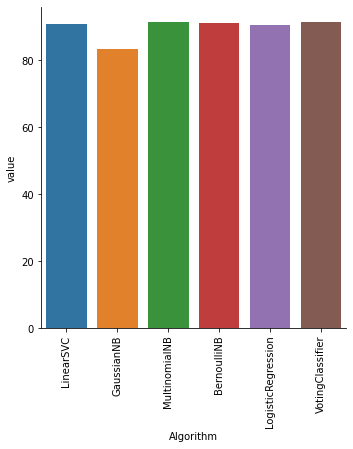

In [51]:
sns.catplot(data=plot_df, x='Algorithm', y='value', kind='bar', height=5)
plt.xticks(rotation='vertical')
plt.show()

In [52]:
# Saving the Best Model
import pickle
pickle.dump(voting, open('model.pkl','wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))